In [1]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import os
import scipy
import numpy as np
import seaborn as sns
from functools import reduce

from auditory_cortex.plotters import tikzplots
from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.plotters.plotter_utils import PlotterUtils

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline


INFO:Please install tensorboardX: pip install tensorboardX

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


/bin/sh: line 1: sox: command not found
/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


In [2]:
threshold=0.5
save_tikz =True

INFO:Plotting trained and shuffled distributions for wav2letter_modified
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (404,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.5656012252152693, occurs at x_coordinate: 3
INFO:Peak corr (max): 0.9464127529538994, occurs at x_coordinate: 0
INFO:Peak corr (median): 0.38137897872641213, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.9999351393504008, occurs at x_coordinate: 0
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.4952501367854381, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.8593246688607602, occurs at x_coordinate: 0
result saved at: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-0.5-Reg-trained-timit-trf50-all-bw50ms-wav2letter_modifie

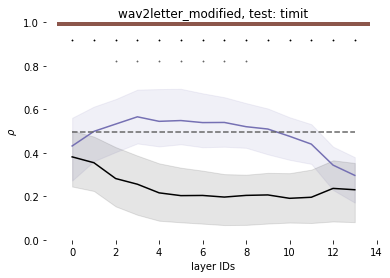

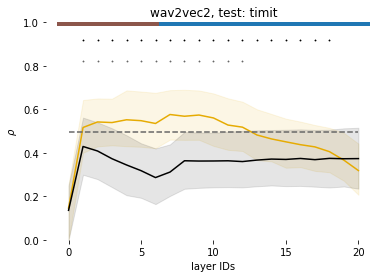

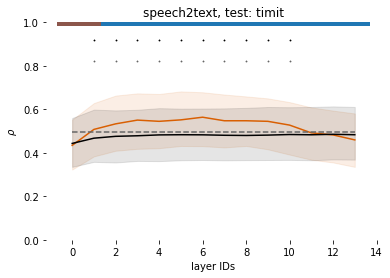

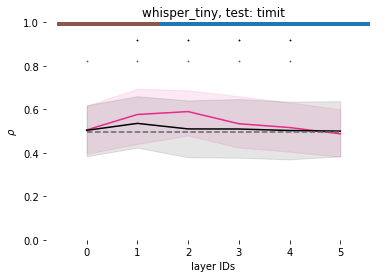

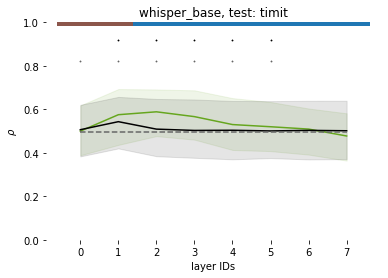

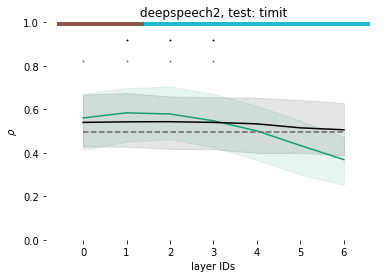

In [3]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
]
lag = 50
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
baseline_identifier = f"mel_wh_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
tikz_indicator = f'trf{lag}'
mVocs = True if 'mVocs' in trained_identifier else False
normalized=True
bin_width = 50
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
# model_name = model_names[0]
# plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

INFO:Plotting trained and shuffled distributions for wav2letter_modified
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (489,)
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.6840778966636638, occurs at x_coordinate: 6
INFO:Peak corr (max): 1.1250448406877556, occurs at x_coordinate: 5
INFO:Peak corr (median): 0.435596621515992, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.9104777708360464, occurs at x_coordinate: 13
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.5745828506354499, occurs at x_coordinate: 0
INFO:Peak corr (max): 1.1462292132706315, occurs at x_coordinate: 0
result saved at: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-0.5-Reg-trained-mVocs-trf50-

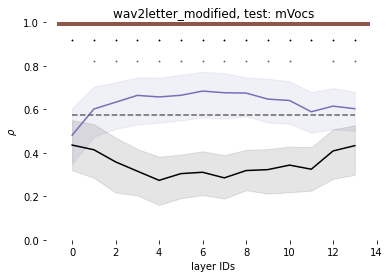

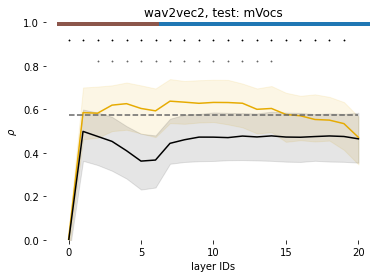

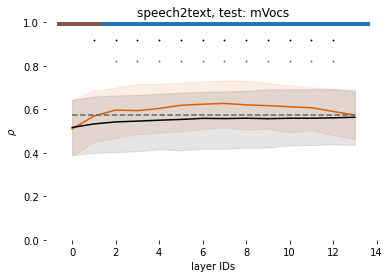

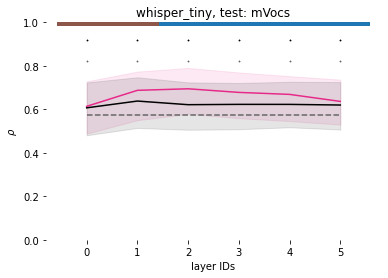

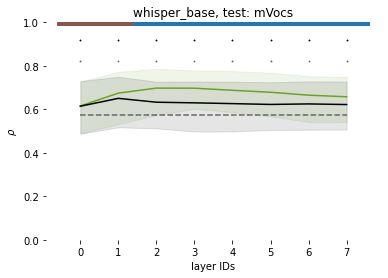

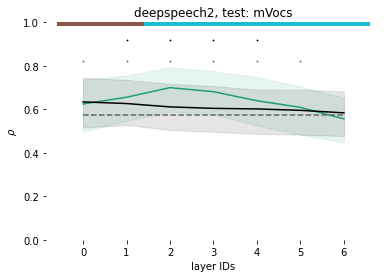

In [4]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
]
lag=50
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
baseline_identifier = f"mel_wh_ucsf_mVocs_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
tikz_indicator = f'trf{lag}'
mVocs = True if 'mVocs' in trained_identifier else False
normalized=True
bin_width = 50
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
# model_name = model_names[0]
# plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...


/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...


/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...


/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...


/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...


/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels in core: 1800
INFO:Number of channels in non-primary: 624


/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/3010998059.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-0.5-peak-layer-histogram-timit-50ms-all-models.png


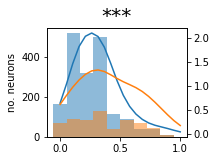

In [6]:
model_names = [
	'deepspeech2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'wav2vec2',
	'wav2letter_modified',
	]
identifier = 'ucsf_timit_trf_lags50_bw50_regression_improved'
bin_width = 50
mVocs = False
tikzplots.plot_peak_layer_histograms_all_models(
	model_names,
	identifier,
	bin_width=bin_width,
	mVocs=mVocs,
	threshold=threshold,
	save_tikz=save_tikz,
	fontsize=20,
	figsize=(2.5,2),
	)


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...


/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels in core: 1890
INFO:Number of channels in non-primary: 1044


/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(
/tmp/ipykernel_810228/1160931379.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  tikzplots.plot_peak_layer_histograms_all_models(


INFO:Saved: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-0.5-peak-layer-histogram-mVocs-50ms-all-models.png


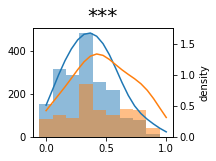

In [7]:
model_names = [
	'deepspeech2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'wav2vec2',
	'wav2letter_modified',
	]
identifier = 'ucsf_mVocs_trf_lags50_bw50_regression_improved'
bin_width = 50
mVocs = True
tikzplots.plot_peak_layer_histograms_all_models(
	model_names,
	identifier,
	bin_width=bin_width,
	mVocs=mVocs,
	threshold=threshold,
	save_tikz=save_tikz,
	fontsize=20,
	figsize=(2.5,2),
	)


### WERs vs corr

INFO:Reading existing WER results
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
result saved at: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-0.5-WER-vs-corr-50ms-librispeech-test-other.tex
result saved at: /depot/jgmakin/data/auditory_cortex/results/tikz_plots/gap-0.5-WER-vs-corr-50ms-librispeech-test-clean.tex
result saved at: /depot/jgmakin/data/auditory_

[<AxesSubplot:title={'center':'librispeech-test-other'}, xlabel='WER (%)', ylabel='$\\rho$'>,
 <AxesSubplot:title={'center':'librispeech-test-clean'}, xlabel='WER (%)', ylabel='$\\rho$'>,
 <AxesSubplot:title={'center':'tedlium'}, xlabel='WER (%)', ylabel='$\\rho$'>,
 <AxesSubplot:title={'center':'common-voice'}, xlabel='WER (%)', ylabel='$\\rho$'>,
 <AxesSubplot:title={'center':'voxpopuli'}, xlabel='WER (%)', ylabel='$\\rho$'>]

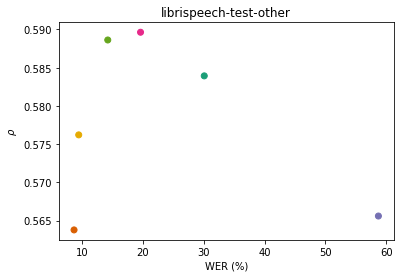

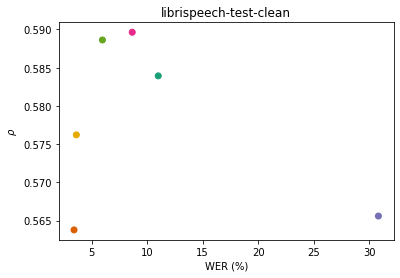

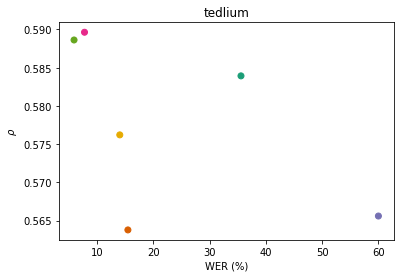

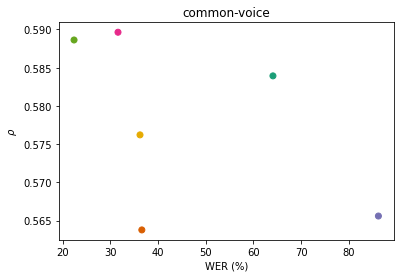

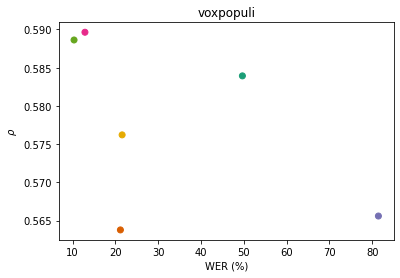

In [8]:
threshold = 0.5
save_tikz = True

bin_width = 50
mVocs=False
trained_identifier = 'ucsf_timit_trf_lags50_bw50_regression_improved'
tikzplots.scatter_WER_v_corr(
	trained_identifier = trained_identifier,
	save_tikz=save_tikz,
	bin_width=bin_width,
    threshold=threshold,
	use_stat_inclusion=False,
	inclusion_p_threshold=0.01,
	use_poisson_null=True,
	normalized = True,
	mVocs=mVocs,
	)